Random Forest and Deep Learning using h2o

In [1]:
#Reading file
url="https://raw.githubusercontent.com/rajsiddarth/Datasets/master/Bank_dataset.csv"
import pandas as pd
data=pd.read_csv(url,header=0,names=["id","age","experience","income","zipcode","family"
             ,"ccavg","education","mortgage","pers_loan","sec_amount","cd_account","online","credit_card"])
#Removing id,zipcode and experience
data.drop(['id','experience','zipcode'],inplace=True,axis=1)
categ_data=data.loc[:,['education','sec_amount','cd_account','online','credit_card']]
dep_data=pd.DataFrame(data.loc[:,'pers_loan'])

In [2]:
#Converting to factors

for i in categ_data.columns:
    categ_data[i]= categ_data[i].astype('category')
dep_data['pers_loan']=dep_data['pers_loan'].astype('category')
data.drop(['education','pers_loan','sec_amount','cd_account','online','credit_card'],inplace=True,axis=1)
data=pd.concat([data,categ_data,dep_data],axis=1)
data.head()

,age,income,family,ccavg,mortgage,education,sec_amount,cd_account,online,credit_card,pers_loan
0,25,49,4,1.6,0,1,1,0,0,0,0
1,45,34,3,1.5,0,1,1,0,0,0,0
2,39,11,1,1.0,0,1,0,0,0,0,0
3,35,100,1,2.7,0,2,0,0,0,0,0
4,35,45,4,1.0,0,2,0,0,0,1,0


Checking for data types

In [3]:
print data.dtypes
print data.shape

age               int64
income            int64
family            int64
ccavg           float64
mortgage          int64
education      category
sec_amount     category
cd_account     category
online         category
credit_card    category
pers_loan      category
dtype: object
(5000, 11)


Splitting into train and test data using Stratified sampling based on target variable 

In [4]:
from sklearn.cross_validation import StratifiedShuffleSplit
X=data.loc[:,data.columns.difference(['pers_loan'])]
Y=data.loc[:,'pers_loan']
index=StratifiedShuffleSplit(Y,n_iter=1,random_state=42,test_size=0.3)
for trainindex,testindex in index:
    X_train,X_test=X.loc[trainindex],X.loc[testindex]
    y_train,y_test=Y.loc[trainindex],Y.loc[testindex]
print y_train.value_counts(),y_test.value_counts()

0    3164
1     336
Name: pers_loan, dtype: int64 0    1356
1     144
Name: pers_loan, dtype: int64


C:\Users\sid\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Implementing random forest model

In [5]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score

model=rf(n_estimators=50,criterion="gini",random_state=42,verbose=0)

#Fitting the model
model.fit(X_train,y_train)

#Predicting using the model on train data
pred=model.predict(X_test)

# evaluate accuracy
print (accuracy_score(y_test,pred))

0.988


Variable importance plot

In [6]:
importance=model.feature_importances_

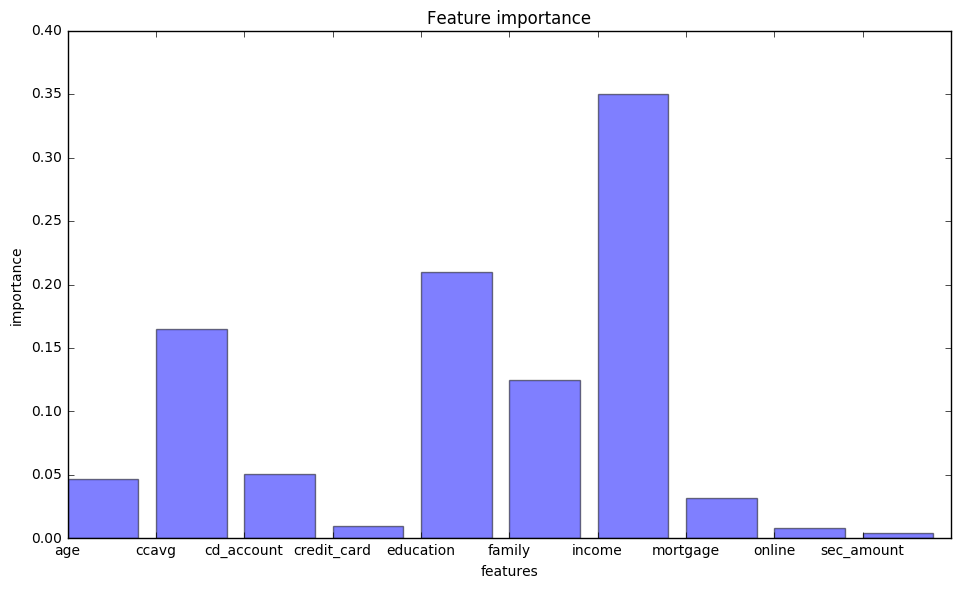

In [7]:
#Plotting variable importance
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(X_train.columns.values))
bar_width = 0.35
plt.bar(index,importance, color='b', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index,X_train.columns)
plt.tight_layout()
plt.show()

Implementing Deep learning using h2o platform

In [8]:
import h2o
h2o.init(nthreads = -1, max_mem_size = "1g")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\sid\Anaconda2\h2o_jar\h2o.jar
  Ice root: c:\users\sid\appdata\local\temp\tmps9opie
  JVM stdout: c:\users\sid\appdata\local\temp\tmps9opie\h2o_sid_started_from_python.out
  JVM stderr: c:\users\sid\appdata\local\temp\tmps9opie\h2o_sid_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,05 secs
H2O cluster version:,3.10.0.9
H2O cluster version age:,7 months and 3 days !!!
H2O cluster name:,H2O_from_python_sid_ld91oq
H2O cluster total nodes:,1
H2O cluster free memory:,910 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


Adding data frames to h20 and building Autoencoder

In [9]:
y_train,y_test=pd.DataFrame(y_train),pd.DataFrame(y_test)
train_data,test_data=pd.concat([X_train,y_train],axis=1),pd.concat([X_test,y_test],axis=1)

#Importing H2OFrame to import python object into h2o
from h2o.frame import H2OFrame
train_data,test_data= H2OFrame(train_data),H2OFrame(test_data)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Train deep autoencoder learning model

In [10]:
train_data

age,ccavg,cd_account,credit_card,education,family,income,mortgage,online,sec_amount,pers_loan
47,2.67,0,0,2,1,81,0,1,0,0
49,1,0,0,1,1,31,0,1,1,0
56,3.7,0,0,1,2,65,0,1,0,0
50,7.3,0,1,1,1,155,0,1,0,0
35,2.8,0,0,1,3,58,0,1,0,0
48,0.7,0,0,1,3,74,0,1,1,0
47,0.8,0,0,3,2,93,107,0,0,0
55,0.7,0,0,3,4,21,0,0,0,0
53,0.5,0,1,2,1,22,0,1,0,0
42,3.5,0,1,1,1,115,0,0,0,0


In [51]:
#Preparing train and test sets
y_train,y_test=train_data['pers_loan'].asfactor(),test_data['pers_loan'].asfactor()
categ_data1,categ_data2=train_data.drop(['age','ccavg','pers_loan','family','income','mortgage','sec_amount']).asfactor(),test_data.drop(['age','ccavg','sec_amount','pers_loan','family','income','mortgage']).asfactor()
temp_data1,temp_data2=train_data[['age','ccavg','family','income','mortgage','sec_amount']],test_data[['age','sec_amount','ccavg','family','income','mortgage']]

#Concatanate categorical ad numeric data
data1,data2=categ_data1.concat([temp_data1],axis=1),categ_data2.concat([temp_data2],axis=1)
train,test=data1.concat([y_train],axis=1),data2.concat([y_test],axis=1),
X_train,X_test=data1,data2
print y_train.types
print X_train.types


{'pers_loan': u'enum'}
{'ccavg': u'real', 'mortgage': u'int', 'family': u'int', 'income': u'int', 'age': u'int', 'sec_amount': u'int', u'credit_card': u'enum'}


Building DeepLearning model 

In [50]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

model = H2ODeepLearningEstimator(distribution="multinomial",activation="tanh_with_dropout",hidden=[50,50,50],sparse=True,l1=1e-4,epochs=100,
                                input_dropout_ratio=0.1,variable_importances=True,nfolds=5)
                                   

In [52]:
#training model
model.train(x=data1.columns,y="pers_loan",training_frame=train)


deeplearning Model Build progress: |██████████████████████████████████████| 100%


Displaying performance metrics

In [53]:
model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1496736115661_10
Status of Neuron Layers: predicting pers_loan, 2-class classification, multinomial distribution, CrossEntropy loss, 6,202 weights/biases, 79.3 KB, 385,000 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,19,Input,10.0,,,,,,,,,
,2,50,TanhDropout,50.0,0.0001,0.0,0.2117783,0.4102108,0.0,0.0376196,1.1713943,0.0020606,1.1227937
,3,50,TanhDropout,50.0,0.0001,0.0,0.0094161,0.0214251,0.0,-0.0032480,0.5070341,-0.0118283,1.2967100
,4,50,TanhDropout,50.0,0.0001,0.0,0.0508906,0.1332909,0.0,-0.0016964,0.1918201,0.0292983,0.4668208
,5,2,Softmax,,0.0001,0.0,0.0193523,0.1176573,0.0,-0.0234441,0.4128304,-0.0130815,0.9297132




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0374867531657
RMSE: 0.19361496111
LogLoss: 0.134131204218
Mean Per-Class Error: 0.0847687526338
AUC: 0.970069720366
Gini: 0.940139440732
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30876653834: 


,0,1,Error,Rate
0,3113.0,51.0,0.0161,(51.0/3164.0)
1,79.0,257.0,0.2351,(79.0/336.0)
Total,3192.0,308.0,0.0371,(130.0/3500.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3087665,0.7981366,146.0
max f2,0.0962572,0.8164937,242.0
max f0point5,0.4623582,0.8308157,100.0
max accuracy,0.3156085,0.9628571,144.0
max precision,0.6581360,1.0,0.0
max recall,0.0124035,1.0,392.0
max specificity,0.6581360,1.0,0.0
max absolute_mcc,0.3087665,0.7786189,146.0
max min_per_class_accuracy,0.0736977,0.9086599,269.0
max mean_per_class_accuracy,0.0962572,0.9152312,242.0


Gains/Lift Table: Avg response rate:  9.60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.6563358,10.4166667,10.4166667,1.0,1.0,0.1041667,0.1041667,941.6666667,941.6666667
,2,0.02,0.6523158,9.2261905,9.8214286,0.8857143,0.9428571,0.0922619,0.1964286,822.6190476,882.1428571
,3,0.03,0.6390291,8.6309524,9.4246032,0.8285714,0.9047619,0.0863095,0.2827381,763.0952381,842.4603175
,4,0.04,0.6292032,10.1190476,9.5982143,0.9714286,0.9214286,0.1011905,0.3839286,911.9047619,859.8214286
,5,0.05,0.6063924,8.9285714,9.4642857,0.8571429,0.9085714,0.0892857,0.4732143,792.8571429,846.4285714
,6,0.1,0.1960377,6.4880952,7.9761905,0.6228571,0.7657143,0.3244048,0.7976190,548.8095238,697.6190476
,7,0.15,0.0842467,1.9642857,5.9722222,0.1885714,0.5733333,0.0982143,0.8958333,96.4285714,497.2222222
,8,0.2,0.0588496,0.8928571,4.7023810,0.0857143,0.4514286,0.0446429,0.9404762,-10.7142857,370.2380952
,9,0.3,0.0342866,0.1785714,3.1944444,0.0171429,0.3066667,0.0178571,0.9583333,-82.1428571,219.4444444
,10,0.4,0.0215800,0.2083333,2.4479167,0.02,0.235,0.0208333,0.9791667,-79.1666667,144.7916667




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.0376753629732
RMSE: 0.194101424449
LogLoss: 0.135341518619
Mean Per-Class Error: 0.0929203539823
AUC: 0.9607324401
Gini: 0.9214648802
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.388100194917: 


,0,1,Error,Rate
0,3094.0,70.0,0.0221,(70.0/3164.0)
1,73.0,263.0,0.2173,(73.0/336.0)
Total,3167.0,333.0,0.0409,(143.0/3500.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3881002,0.7862481,153.0
max f2,0.2383975,0.7948140,212.0
max f0point5,0.5007413,0.8005618,115.0
max accuracy,0.3881002,0.9591429,153.0
max precision,0.7798890,1.0,0.0
max recall,0.0106412,1.0,391.0
max specificity,0.7798890,1.0,0.0
max absolute_mcc,0.3881002,0.7636708,153.0
max min_per_class_accuracy,0.1079401,0.9039191,284.0
max mean_per_class_accuracy,0.0839398,0.9070796,301.0


Gains/Lift Table: Avg response rate:  9.60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.7334891,9.8214286,9.8214286,0.9428571,0.9428571,0.0982143,0.0982143,882.1428571,882.1428571
,2,0.02,0.6928595,8.9285714,9.375,0.8571429,0.9,0.0892857,0.1875,792.8571429,837.5
,3,0.03,0.6479753,8.3333333,9.0277778,0.8,0.8666667,0.0833333,0.2708333,733.3333333,802.7777778
,4,0.04,0.6220193,9.2261905,9.0773810,0.8857143,0.8714286,0.0922619,0.3630952,822.6190476,807.7380952
,5,0.05,0.5970436,9.2261905,9.1071429,0.8857143,0.8742857,0.0922619,0.4553571,822.6190476,810.7142857
,6,0.1,0.3399548,6.7261905,7.9166667,0.6457143,0.76,0.3363095,0.7916667,572.6190476,691.6666667
,7,0.15,0.1530605,1.7261905,5.8531746,0.1657143,0.5619048,0.0863095,0.8779762,72.6190476,485.3174603
,8,0.2,0.0737658,1.0119048,4.6428571,0.0971429,0.4457143,0.0505952,0.9285714,1.1904762,364.2857143
,9,0.3,0.0289900,0.2678571,3.1845238,0.0257143,0.3057143,0.0267857,0.9553571,-73.2142857,218.4523810
,10,0.4,0.0138734,0.1488095,2.4255952,0.0142857,0.2328571,0.0148810,0.9702381,-85.1190476,142.5595238



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9624398,0.0045850,0.9733893,0.9562683,0.9602357,0.965847,0.9564586
auc,0.9661146,0.0069172,0.9723753,0.9467847,0.9714912,0.9718502,0.968072
err,0.0375602,0.0045850,0.0266106,0.0437318,0.0397644,0.0341530,0.0435414
err_count,26.2,2.8774989,19.0,30.0,27.0,25.0,30.0
f0point5,0.8141792,0.0242135,0.875,0.7836990,0.8288044,0.7939189,0.7894737
f1,0.7965801,0.0261990,0.8549618,0.7692308,0.8187919,0.789916,0.75
f2,0.7800731,0.0298707,0.8358209,0.755287,0.8090186,0.7859532,0.7142857
lift_top_group,9.936483,1.069964,10.5,10.238806,7.6578946,12.2,9.085714
logloss,0.1356553,0.0087051,0.1311911,0.1511206,0.1465405,0.1163249,0.1330990
max_per_class_error,0.2303859,0.0327208,0.1764706,0.2537313,0.1973684,0.2166667,0.3076923


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-06-06 14:16:25,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2017-06-06 14:16:27,51.888 sec,28340 obs/sec,10.0,1,35000.0,0.2046760,0.1459836,0.9594122,10.4166667,0.0491429
,2017-06-06 14:16:33,58.038 sec,28649 obs/sec,60.0,6,210000.0,0.1992744,0.1417528,0.9661853,10.4166667,0.034
,2017-06-06 14:16:39,1 min 4.120 sec,28819 obs/sec,110.0,11,385000.0,0.1936150,0.1341312,0.9700697,10.4166667,0.0371429


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
cd_account.1,1.0,1.0,0.2904788
income,0.3277385,0.3277385,0.0952011
education.2,0.3205053,0.3205053,0.0931000
education.3,0.3178874,0.3178874,0.0923395
cd_account.0,0.2599115,0.2599115,0.0754988
credit_card.1,0.2311025,0.2311025,0.0671304
ccavg,0.2152246,0.2152246,0.0625182
online.1,0.1669591,0.1669591,0.0484981
education.1,0.1054023,0.1054023,0.0306171
credit_card.0,0.1011096,0.1011096,0.0293702


In [55]:
#Train data metrics
model.model_performance(test_data=train)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.0374867531657
RMSE: 0.19361496111
LogLoss: 0.134131204218
Mean Per-Class Error: 0.0847687526338
AUC: 0.970040560472
Gini: 0.940081120944
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30876653834: 


,0,1,Error,Rate
0,3113.0,51.0,0.0161,(51.0/3164.0)
1,79.0,257.0,0.2351,(79.0/336.0)
Total,3192.0,308.0,0.0371,(130.0/3500.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3087665,0.7981366,145.0
max f2,0.0962572,0.8164937,240.0
max f0point5,0.4623582,0.8308157,99.0
max accuracy,0.3156085,0.9628571,143.0
max precision,0.6578842,1.0,0.0
max recall,0.0122631,1.0,394.0
max specificity,0.6578842,1.0,0.0
max absolute_mcc,0.3087665,0.7786189,145.0
max min_per_class_accuracy,0.0736977,0.9086599,267.0
max mean_per_class_accuracy,0.0962572,0.9152312,240.0


Gains/Lift Table: Avg response rate:  9.60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.6563358,10.4166667,10.4166667,1.0,1.0,0.1041667,0.1041667,941.6666667,941.6666667
,2,0.02,0.6523158,9.2261905,9.8214286,0.8857143,0.9428571,0.0922619,0.1964286,822.6190476,882.1428571
,3,0.03,0.6390291,8.6309524,9.4246032,0.8285714,0.9047619,0.0863095,0.2827381,763.0952381,842.4603175
,4,0.04,0.6292032,10.1190476,9.5982143,0.9714286,0.9214286,0.1011905,0.3839286,911.9047619,859.8214286
,5,0.05,0.6063924,8.9285714,9.4642857,0.8571429,0.9085714,0.0892857,0.4732143,792.8571429,846.4285714
,6,0.1,0.1960377,6.4880952,7.9761905,0.6228571,0.7657143,0.3244048,0.7976190,548.8095238,697.6190476
,7,0.15,0.0842467,1.9642857,5.9722222,0.1885714,0.5733333,0.0982143,0.8958333,96.4285714,497.2222222
,8,0.2,0.0588496,0.8928571,4.7023810,0.0857143,0.4514286,0.0446429,0.9404762,-10.7142857,370.2380952
,9,0.3,0.0342866,0.1785714,3.1944444,0.0171429,0.3066667,0.0178571,0.9583333,-82.1428571,219.4444444
,10,0.4,0.0215800,0.2083333,2.4479167,0.02,0.235,0.0208333,0.9791667,-79.1666667,144.7916667


In [56]:
#Test data performance metrics
model.model_performance(test_data=test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.0380405240371
RMSE: 0.195039801162
LogLoss: 0.135127026254
Mean Per-Class Error: 0.0853306293019
AUC: 0.969405522779
Gini: 0.938811045559
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29787382422: 


,0,1,Error,Rate
0,1329.0,27.0,0.0199,(27.0/1356.0)
1,32.0,112.0,0.2222,(32.0/144.0)
Total,1361.0,139.0,0.0393,(59.0/1500.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2978738,0.7915194,109.0
max f2,0.2216687,0.8071135,125.0
max f0point5,0.4547315,0.8219178,83.0
max accuracy,0.3089682,0.9606667,104.0
max precision,0.6579125,1.0,0.0
max recall,0.0127678,1.0,386.0
max specificity,0.6579125,1.0,0.0
max absolute_mcc,0.2978738,0.7699583,109.0
max min_per_class_accuracy,0.0741780,0.9107670,211.0
max mean_per_class_accuracy,0.0865072,0.9146694,202.0


Gains/Lift Table: Avg response rate:  9.60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.6559839,10.4166667,10.4166667,1.0,1.0,0.1041667,0.1041667,941.6666667,941.6666667
,2,0.02,0.6454479,8.3333333,9.375,0.8,0.9,0.0833333,0.1875,733.3333333,837.5
,3,0.03,0.6359541,9.7222222,9.4907407,0.9333333,0.9111111,0.0972222,0.2847222,872.2222222,849.0740741
,4,0.04,0.6277658,8.3333333,9.2013889,0.8,0.8833333,0.0833333,0.3680556,733.3333333,820.1388889
,5,0.05,0.6137297,9.7222222,9.3055556,0.9333333,0.8933333,0.0972222,0.4652778,872.2222222,830.5555556
,6,0.1,0.2389537,6.5277778,7.9166667,0.6266667,0.76,0.3263889,0.7916667,552.7777778,691.6666667
,7,0.15,0.0947565,1.8055556,5.8796296,0.1733333,0.5644444,0.0902778,0.8819444,80.5555556,487.9629630
,8,0.2,0.0601720,1.25,4.7222222,0.12,0.4533333,0.0625,0.9444444,25.0,372.2222222
,9,0.3,0.0341271,0.2777778,3.2407407,0.0266667,0.3111111,0.0277778,0.9722222,-72.2222222,224.0740741
,10,0.4,0.0219989,0.0694444,2.4479167,0.0066667,0.235,0.0069444,0.9791667,-93.0555556,144.7916667


In [59]:
#Variable importan

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1496736115661_10
Status of Neuron Layers: predicting pers_loan, 2-class classification, multinomial distribution, CrossEntropy loss, 6,202 weights/biases, 79.3 KB, 385,000 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,19,Input,10.0,,,,,,,,,
,2,50,TanhDropout,50.0,0.0001,0.0,0.2117783,0.4102108,0.0,0.0376196,1.1713943,0.0020606,1.1227937
,3,50,TanhDropout,50.0,0.0001,0.0,0.0094161,0.0214251,0.0,-0.0032480,0.5070341,-0.0118283,1.2967100
,4,50,TanhDropout,50.0,0.0001,0.0,0.0508906,0.1332909,0.0,-0.0016964,0.1918201,0.0292983,0.4668208
,5,2,Softmax,,0.0001,0.0,0.0193523,0.1176573,0.0,-0.0234441,0.4128304,-0.0130815,0.9297132




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0374867531657
RMSE: 0.19361496111
LogLoss: 0.134131204218
Mean Per-Class Error: 0.0847687526338
AUC: 0.970069720366
Gini: 0.940139440732
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30876653834: 


,0,1,Error,Rate
0,3113.0,51.0,0.0161,(51.0/3164.0)
1,79.0,257.0,0.2351,(79.0/336.0)
Total,3192.0,308.0,0.0371,(130.0/3500.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3087665,0.7981366,146.0
max f2,0.0962572,0.8164937,242.0
max f0point5,0.4623582,0.8308157,100.0
max accuracy,0.3156085,0.9628571,144.0
max precision,0.6581360,1.0,0.0
max recall,0.0124035,1.0,392.0
max specificity,0.6581360,1.0,0.0
max absolute_mcc,0.3087665,0.7786189,146.0
max min_per_class_accuracy,0.0736977,0.9086599,269.0
max mean_per_class_accuracy,0.0962572,0.9152312,242.0


Gains/Lift Table: Avg response rate:  9.60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.6563358,10.4166667,10.4166667,1.0,1.0,0.1041667,0.1041667,941.6666667,941.6666667
,2,0.02,0.6523158,9.2261905,9.8214286,0.8857143,0.9428571,0.0922619,0.1964286,822.6190476,882.1428571
,3,0.03,0.6390291,8.6309524,9.4246032,0.8285714,0.9047619,0.0863095,0.2827381,763.0952381,842.4603175
,4,0.04,0.6292032,10.1190476,9.5982143,0.9714286,0.9214286,0.1011905,0.3839286,911.9047619,859.8214286
,5,0.05,0.6063924,8.9285714,9.4642857,0.8571429,0.9085714,0.0892857,0.4732143,792.8571429,846.4285714
,6,0.1,0.1960377,6.4880952,7.9761905,0.6228571,0.7657143,0.3244048,0.7976190,548.8095238,697.6190476
,7,0.15,0.0842467,1.9642857,5.9722222,0.1885714,0.5733333,0.0982143,0.8958333,96.4285714,497.2222222
,8,0.2,0.0588496,0.8928571,4.7023810,0.0857143,0.4514286,0.0446429,0.9404762,-10.7142857,370.2380952
,9,0.3,0.0342866,0.1785714,3.1944444,0.0171429,0.3066667,0.0178571,0.9583333,-82.1428571,219.4444444
,10,0.4,0.0215800,0.2083333,2.4479167,0.02,0.235,0.0208333,0.9791667,-79.1666667,144.7916667




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.0376753629732
RMSE: 0.194101424449
LogLoss: 0.135341518619
Mean Per-Class Error: 0.0929203539823
AUC: 0.9607324401
Gini: 0.9214648802
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.388100194917: 


,0,1,Error,Rate
0,3094.0,70.0,0.0221,(70.0/3164.0)
1,73.0,263.0,0.2173,(73.0/336.0)
Total,3167.0,333.0,0.0409,(143.0/3500.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3881002,0.7862481,153.0
max f2,0.2383975,0.7948140,212.0
max f0point5,0.5007413,0.8005618,115.0
max accuracy,0.3881002,0.9591429,153.0
max precision,0.7798890,1.0,0.0
max recall,0.0106412,1.0,391.0
max specificity,0.7798890,1.0,0.0
max absolute_mcc,0.3881002,0.7636708,153.0
max min_per_class_accuracy,0.1079401,0.9039191,284.0
max mean_per_class_accuracy,0.0839398,0.9070796,301.0


Gains/Lift Table: Avg response rate:  9.60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.7334891,9.8214286,9.8214286,0.9428571,0.9428571,0.0982143,0.0982143,882.1428571,882.1428571
,2,0.02,0.6928595,8.9285714,9.375,0.8571429,0.9,0.0892857,0.1875,792.8571429,837.5
,3,0.03,0.6479753,8.3333333,9.0277778,0.8,0.8666667,0.0833333,0.2708333,733.3333333,802.7777778
,4,0.04,0.6220193,9.2261905,9.0773810,0.8857143,0.8714286,0.0922619,0.3630952,822.6190476,807.7380952
,5,0.05,0.5970436,9.2261905,9.1071429,0.8857143,0.8742857,0.0922619,0.4553571,822.6190476,810.7142857
,6,0.1,0.3399548,6.7261905,7.9166667,0.6457143,0.76,0.3363095,0.7916667,572.6190476,691.6666667
,7,0.15,0.1530605,1.7261905,5.8531746,0.1657143,0.5619048,0.0863095,0.8779762,72.6190476,485.3174603
,8,0.2,0.0737658,1.0119048,4.6428571,0.0971429,0.4457143,0.0505952,0.9285714,1.1904762,364.2857143
,9,0.3,0.0289900,0.2678571,3.1845238,0.0257143,0.3057143,0.0267857,0.9553571,-73.2142857,218.4523810
,10,0.4,0.0138734,0.1488095,2.4255952,0.0142857,0.2328571,0.0148810,0.9702381,-85.1190476,142.5595238



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9624398,0.0045850,0.9733893,0.9562683,0.9602357,0.965847,0.9564586
auc,0.9661146,0.0069172,0.9723753,0.9467847,0.9714912,0.9718502,0.968072
err,0.0375602,0.0045850,0.0266106,0.0437318,0.0397644,0.0341530,0.0435414
err_count,26.2,2.8774989,19.0,30.0,27.0,25.0,30.0
f0point5,0.8141792,0.0242135,0.875,0.7836990,0.8288044,0.7939189,0.7894737
f1,0.7965801,0.0261990,0.8549618,0.7692308,0.8187919,0.789916,0.75
f2,0.7800731,0.0298707,0.8358209,0.755287,0.8090186,0.7859532,0.7142857
lift_top_group,9.936483,1.069964,10.5,10.238806,7.6578946,12.2,9.085714
logloss,0.1356553,0.0087051,0.1311911,0.1511206,0.1465405,0.1163249,0.1330990
max_per_class_error,0.2303859,0.0327208,0.1764706,0.2537313,0.1973684,0.2166667,0.3076923


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-06-06 14:16:25,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2017-06-06 14:16:27,51.888 sec,28340 obs/sec,10.0,1,35000.0,0.2046760,0.1459836,0.9594122,10.4166667,0.0491429
,2017-06-06 14:16:33,58.038 sec,28649 obs/sec,60.0,6,210000.0,0.1992744,0.1417528,0.9661853,10.4166667,0.034
,2017-06-06 14:16:39,1 min 4.120 sec,28819 obs/sec,110.0,11,385000.0,0.1936150,0.1341312,0.9700697,10.4166667,0.0371429


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
cd_account.1,1.0,1.0,0.2904788
income,0.3277385,0.3277385,0.0952011
education.2,0.3205053,0.3205053,0.0931000
education.3,0.3178874,0.3178874,0.0923395
cd_account.0,0.2599115,0.2599115,0.0754988
credit_card.1,0.2311025,0.2311025,0.0671304
ccavg,0.2152246,0.2152246,0.0625182
online.1,0.1669591,0.1669591,0.0484981
education.1,0.1054023,0.1054023,0.0306171
credit_card.0,0.1011096,0.1011096,0.0293702


<bound method H2ODeepLearningEstimator.deepfeatures of >